# Álgebra Linear

### Vetores

In [1]:
from typing import List

In [2]:
Vector = List[float]

In [3]:
height_weight_age = [70,  # inches,
                     170, # pounds,
                     40 ] # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62 ]  # exam4

In [4]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [5]:
add([1, 2, 3], [4, 5, 6])

[5, 7, 9]

In [6]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [7]:
subtract([5, 7, 9], [4, 5, 6])

[1, 2, 3]

In [8]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

In [9]:
vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]])

[16, 20]

In [10]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

In [11]:
scalar_multiply(2, [1, 2, 3])

[2, 4, 6]

In [12]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [13]:
vector_mean([[1, 2], [3, 4], [5, 6]])

[3.0, 4.0]

In [14]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [15]:
dot([1, 2, 3], [4, 5, 6])

32

In [16]:
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [17]:
sum_of_squares([1, 2, 3])

14

In [18]:
import math

In [19]:
def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return round(math.sqrt(sum_of_squares(v)),3)   # math.sqrt is square root function

In [20]:
magnitude([3, -5])

5.831

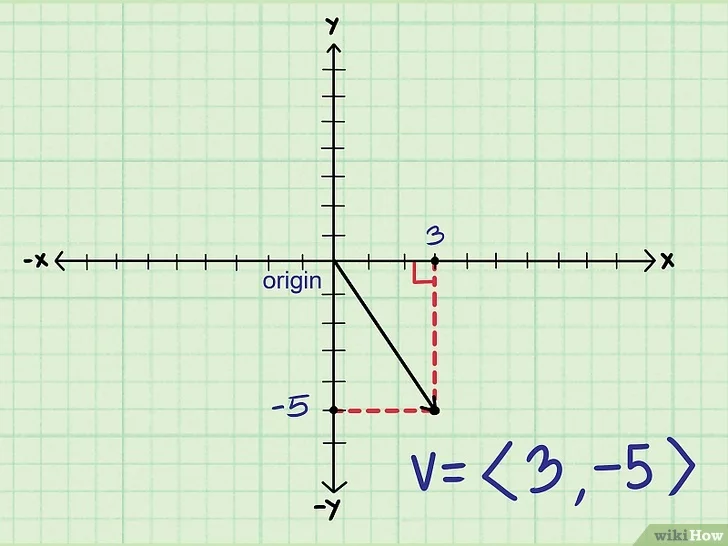

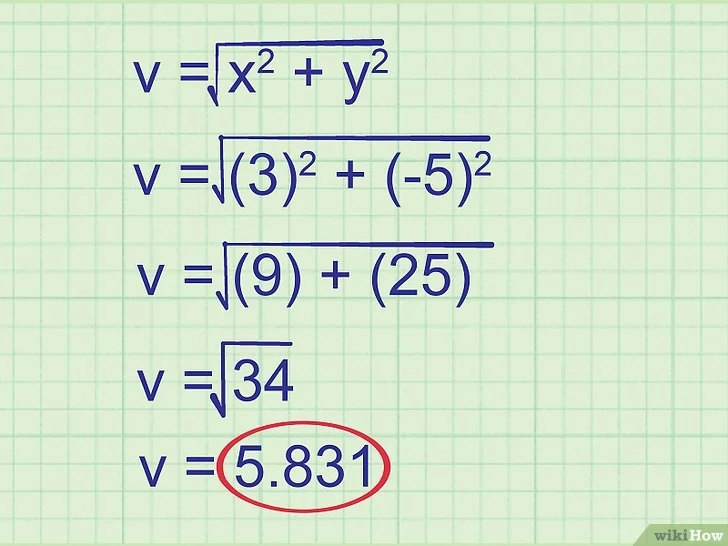

In [21]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

In [22]:
def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [23]:
def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

### Matrizes

In [24]:
Matrix = List[List[float]]

In [25]:
A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]

In [26]:
A

[[1, 2, 3], [4, 5, 6]]

In [27]:
B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

In [28]:
B

[[1, 2], [3, 4], [5, 6]]

In [29]:
from typing import Tuple

In [30]:
def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0   # number of elements in first row
    return num_rows, num_cols

In [31]:
shape([[1, 2, 3], [4, 5, 6]])

(2, 3)

In [32]:
def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]             # A[i] is already the ith row

In [33]:
def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j]          # jth element of row A_i
            for A_i in A]   # for each row A_i

In [34]:
from typing import Callable

In [35]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

In [36]:
def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [37]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [38]:
data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19],
        # ....
       ]

In [39]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [40]:
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

In [41]:
friend_matrix[0][2]

1

In [42]:
friend_matrix[0][8]

0

In [43]:
# only need to look at one row
friends_of_five = [i
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]

In [44]:
friends_of_five

[4, 6, 7]